In [23]:
common_allergens = {
    'cows milk': {'Cheese', 'Butter', 'Margarine', 'Yogurt', 'Cream', 'Ice cream'},
    'eggs': {' egg'},
    'tree nuts': {'Brazil nut', 'Almond', 'Cashew', 'Macadamia nut', 'Pistachio','Pine nut','Walnut'},
    'peanuts': {'peanut'},
    'shellfish': {'Shrimp','Prawn','Crayfish', 'Lobster', 'Squid', 'Scallops'},
    'wheat': {'flour', 'wheat', 'pasta', 'noodle', 'bread', 'crust'},
    'soy': {'soy', 'tofu'},
    'fish': {'fish', 'seafood'}
}

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["figure.dpi"] = 125
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})
plt.rcParams['image.cmap'] = 'gray' # grayscale looks better
from itertools import cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [25]:
from pathlib import Path
import numpy as np
import pandas as pd
from skimage.io import imread as imread
from skimage.util import montage as montage2d
from skimage.color import label2rgb
base_dir = Path('..') / 'recipe'

In [26]:
image_overview_df = pd.read_json("recipe/image_subset.json")
image_overview_df.sample(3)

id      image_path  \
5888  34199b132c  9b842397cc.jpg   
7959  9d230e373a  d27288ca95.jpg   
2513  c5eaa8431d  449b7ec353.jpg   

                                                 images  \
5888  [{'id': '5b00b2c0eb.jpg', 'url': 'http://img.s...   
7959  [{'id': '0b5e51835e.jpg', 'url': 'http://image...   
2513  [{'id': '449b7ec353.jpg', 'url': 'https://img-...   

                                            ingredients  \
5888  [{'text': '12 cup olive oil'}, {'text': '34 cu...   
7959  [{'text': '5 eggs'}, {'text': '4 slices bacon'...   
2513  [{'text': '200 grams Azuki beans'}, {'text': '...   

                                           instructions partition  \
5888  [{'text': 'Preheat oven to 350 degrees F.'}, {...       val   
7959  [{'text': 'Place the potatoes in a pot with en...       val   
2513  [{'text': 'Cook the adzuki beans.'}, {'text': ...       val   

                                             title  \
5888                  Cinnamon Chocolate Chip Cake   
7959                        Potato and Bacon Salad   
2513  Taiyaki-style Snacks (with a sandwich press)   

                                       ingredients_list  \
5888  [12 cup olive oil, 34 cup honey, 2 eggs, 1 cup...   
7959  [5 eggs, 4 slices bacon, 2 tablespoons Dijon m...   
2513  [200 grams Azuki beans, 100 grams Sugar, 80 gr...   

                                 clean_ingredients_list  \
5888  [olive oil, honey, eggs, low - fat plain yogur...   
7959  [eggs, bacon, Dijon mustard, mayonnaise, celer...   
2513  [azuki beans, sugar, light brown sugar, salt, ...   

                                        top_ingredients  
5888  [olive oil, honey, eggs, vanilla, baking powde...  
7959  [eggs, bacon, Dijon mustard, mayonnaise, celer...  
2513  [sugar, salt, sugar, baking powder, egg, veget...

In [27]:
#for flattening a list of lists of ingredients from the "clean_ingredients_list" 
from itertools import chain
image_overview_df['clean_ingredients_list'] = image_overview_df['clean_ingredients_list'].map(lambda c_list: [x.lower() for x in c_list])
all_ingredients = list(chain.from_iterable(image_overview_df['clean_ingredients_list'].values))
#occurrences of each ingredient are then counted using the "pd.value_counts" function
ingredient_list = pd.value_counts(all_ingredients)

In [28]:
#list for all unique ingredients
ing_set = ingredient_list.index.tolist()
#for loop iterates over the items in the "common_allergens" dictionary, key -> name of an allergen, value -> list of items associated with that allergen.
allegen_ingredients = {}
#nested for loop code compares each allergen item from "v" with each ingredient from "ing_set".
#If allergen present in list of ingredients, it is added to "allegen_ingredients" with the key of the allergen name.
for k,v in common_allergens.items():
    allegen_ingredients[k] = []
    for c_item in v:
        for c_ing in ing_set:
            if c_item.lower() in c_ing:
                allegen_ingredients[k].append(c_ing)
for k,v in allegen_ingredients.items():
    print(k, len(v), np.random.permutation(v)[:3])

cows milk 494 ['lemon butter sauce:' 'philadelphia cream cheese'
 'vanilla butternut flavoring']
eggs 38 ['1 bag extra wide egg noodles (12 ounce)' 'cooked egg noodles'
 'extra large egg whites']
tree nuts 61 ['extra pistachios for centers' 'cashew pieces' 'almond meal']
peanuts 32 ['crunchy peanut butter' 'roasted peanuts' 'dry roasted peanuts']
shellfish 40 ['canned shrimp' 'medium - sized shrimp' 'cooked lobster meat']
wheat 366 ['pie crusts' 'pita bread' 'texas toast thick bread']
soy 42 ['unsweetened soymilk' '1/2 packages firm tofu' 'light soya sauce']
fish 35 ['frozen fish sticks' 'fish sauce' 'cod fish fillets']


In [29]:
#adds new columns to the "image_overview_df" dataframe for each allergen in "allegen_ingredients" dictionary for count of ingredients associated with allergen
for k, c_allergens in allegen_ingredients.items():
    image_overview_df[k] = image_overview_df['clean_ingredients_list'].map(lambda c_list: len([x for x in c_list if x in c_allergens]))
    print(k, image_overview_df[k].value_counts())

cows milk 0    3693
1    3507
2    1627
3     532
4     234
5      42
6      16
7       1
8       1
Name: cows milk, dtype: int64
eggs 0    9539
1     112
2       2
Name: eggs, dtype: int64
tree nuts 0    8931
1     665
2      53
3       4
Name: tree nuts, dtype: int64
peanuts 0    9313
1     310
2      28
3       2
Name: peanuts, dtype: int64
shellfish 0    9381
1     258
2      12
3       2
Name: shellfish, dtype: int64
wheat 0    5444
1    3624
2     521
3      58
4       6
Name: wheat, dtype: int64
soy 0    9051
1     539
2      58
3       5
Name: soy, dtype: int64
fish 0    9529
1     111
2      13
Name: fish, dtype: int64


[Text(0, 0, 'cows milk'),
 Text(1, 0, 'eggs'),
 Text(2, 0, 'tree nuts'),
 Text(3, 0, 'peanuts'),
 Text(4, 0, 'shellfish'),
 Text(5, 0, 'wheat'),
 Text(6, 0, 'soy'),
 Text(7, 0, 'fish')]

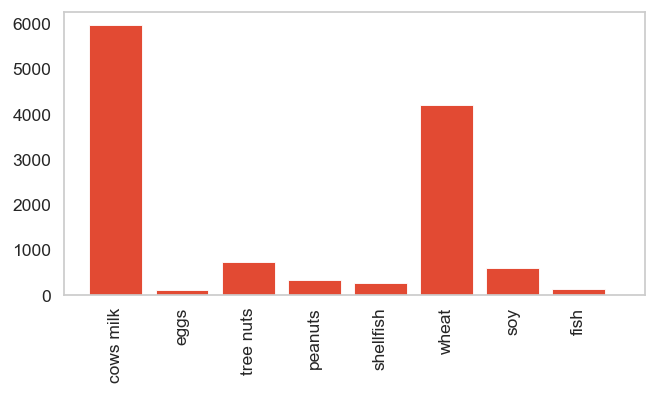

In [30]:
c_alls = list(allegen_ingredients.keys())
fig, ax1 = plt.subplots(1, 1, figsize=(6, 3))
#X-axis -> allergen names, Y-axis -> number of recipes.
ax1.bar(range(len(c_alls)), [sum(image_overview_df[k]>0) for k in c_alls])
ax1.set_xticks(range(1, 1+len(c_alls)))
ax1.set_xticks(range(len(c_alls)))
ax1.set_xticklabels(c_alls, rotation=90)

In [31]:
all_arr = np.stack(image_overview_df[c_alls].values, 0)
all_arr.shape

(9653, 8)

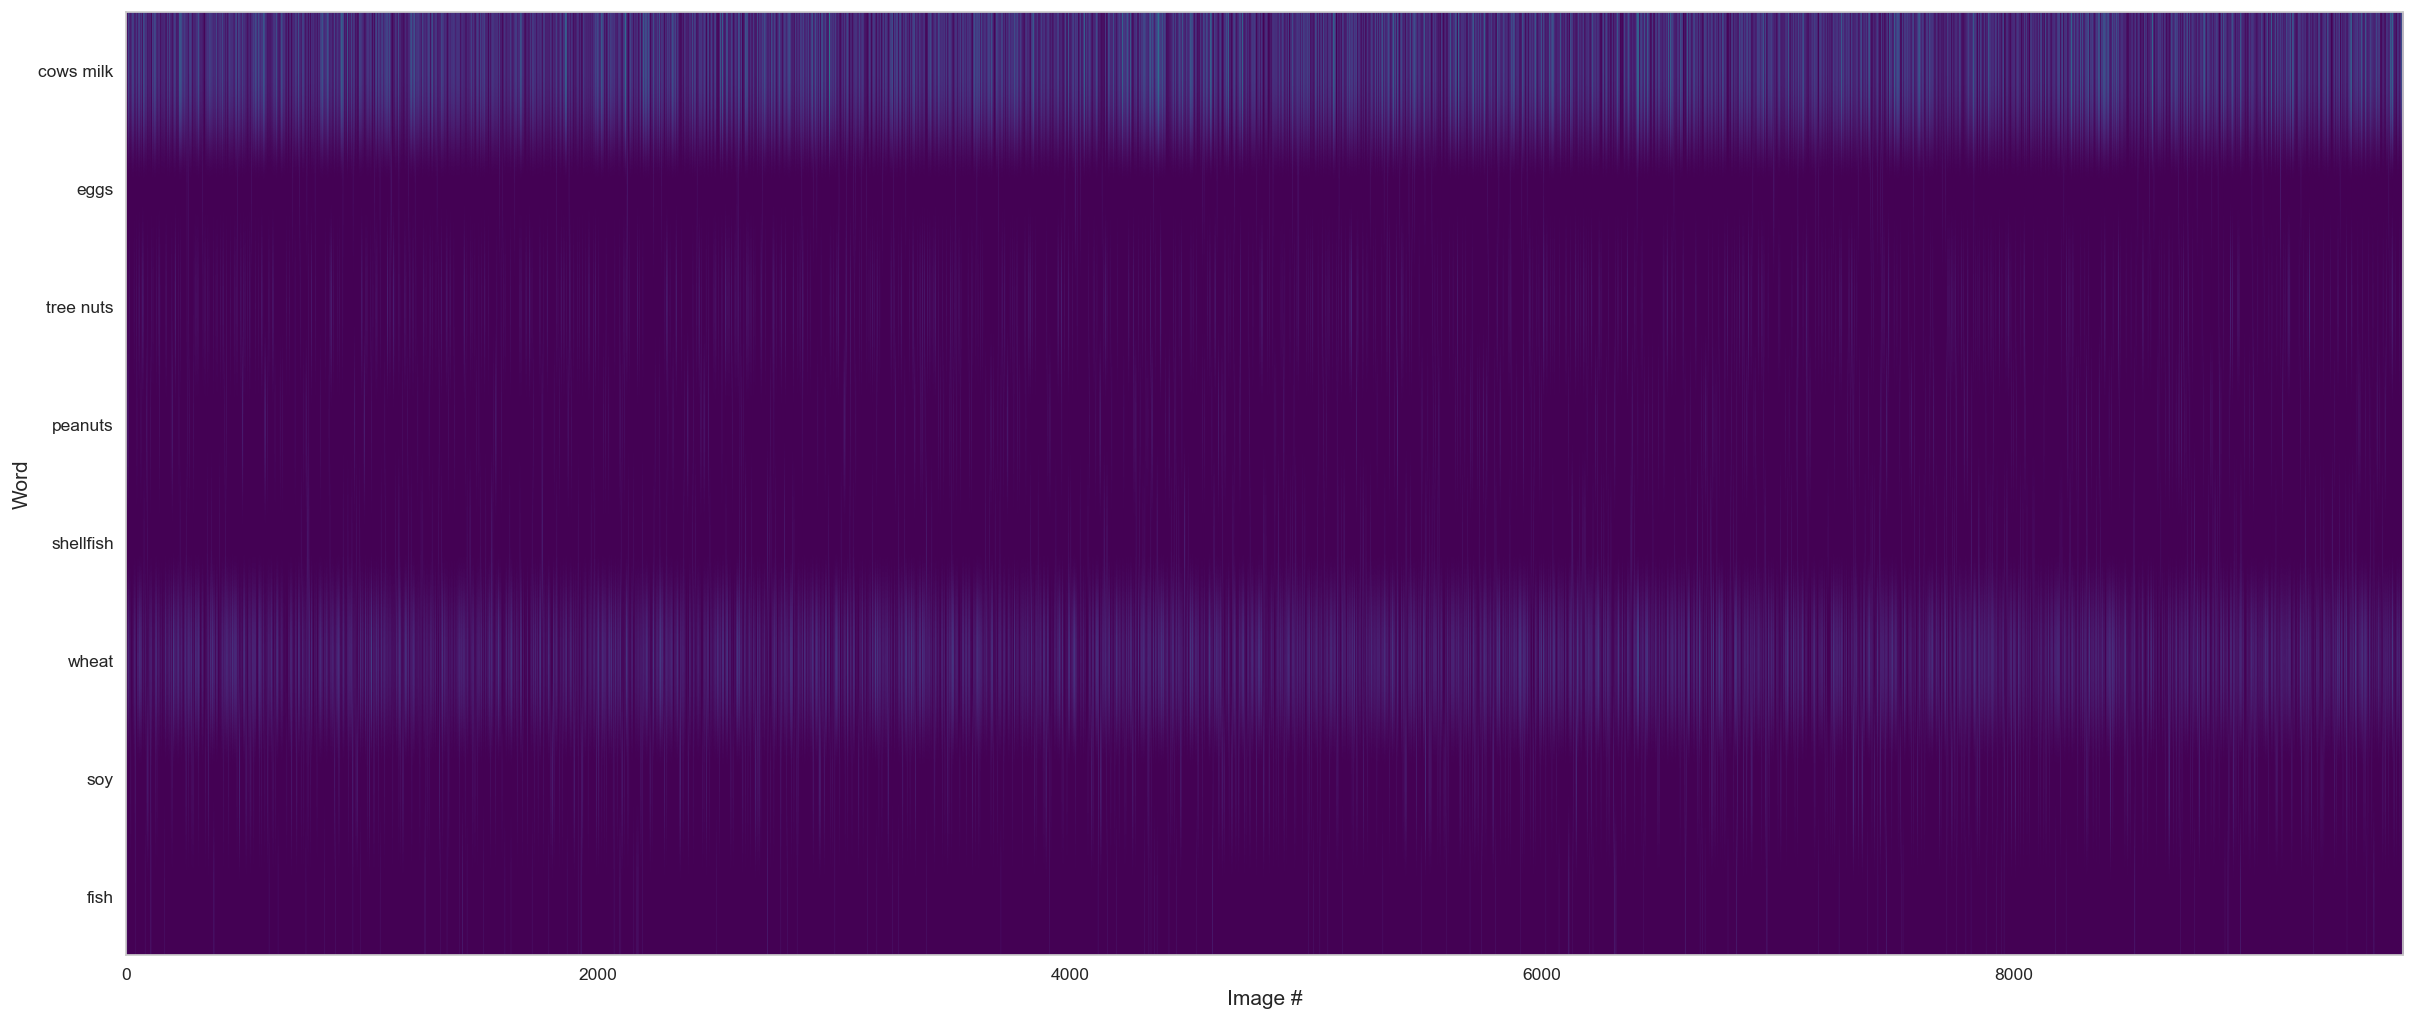

In [32]:
#Displaying a 2D matrix, all_arr.T, as an image in the subplot ax1 using color map.
fig, ax1 = plt.subplots(1, 1, figsize=(50, 10))
ax1.imshow(all_arr.T, cmap='viridis')
ax1.set_aspect(500)
ax1.set_xlabel('Image #')
ax1.set_ylabel('Word')
ax1.set_yticks(range(len(c_alls)))
ax1.set_yticklabels(c_alls);

In [33]:
#grouping the rows of image_overview_df based on the values in a specified column and then 
#taking a random sample of one row from each group.
sample_images_df = pd.concat([image_overview_df.\
     groupby(image_overview_df[k].map(lambda x: x>0)).\
     apply(lambda x: x.sample(1)).\
     reset_index(drop=True) 
     for k in c_alls])
print(sample_images_df.shape)

(16, 18)


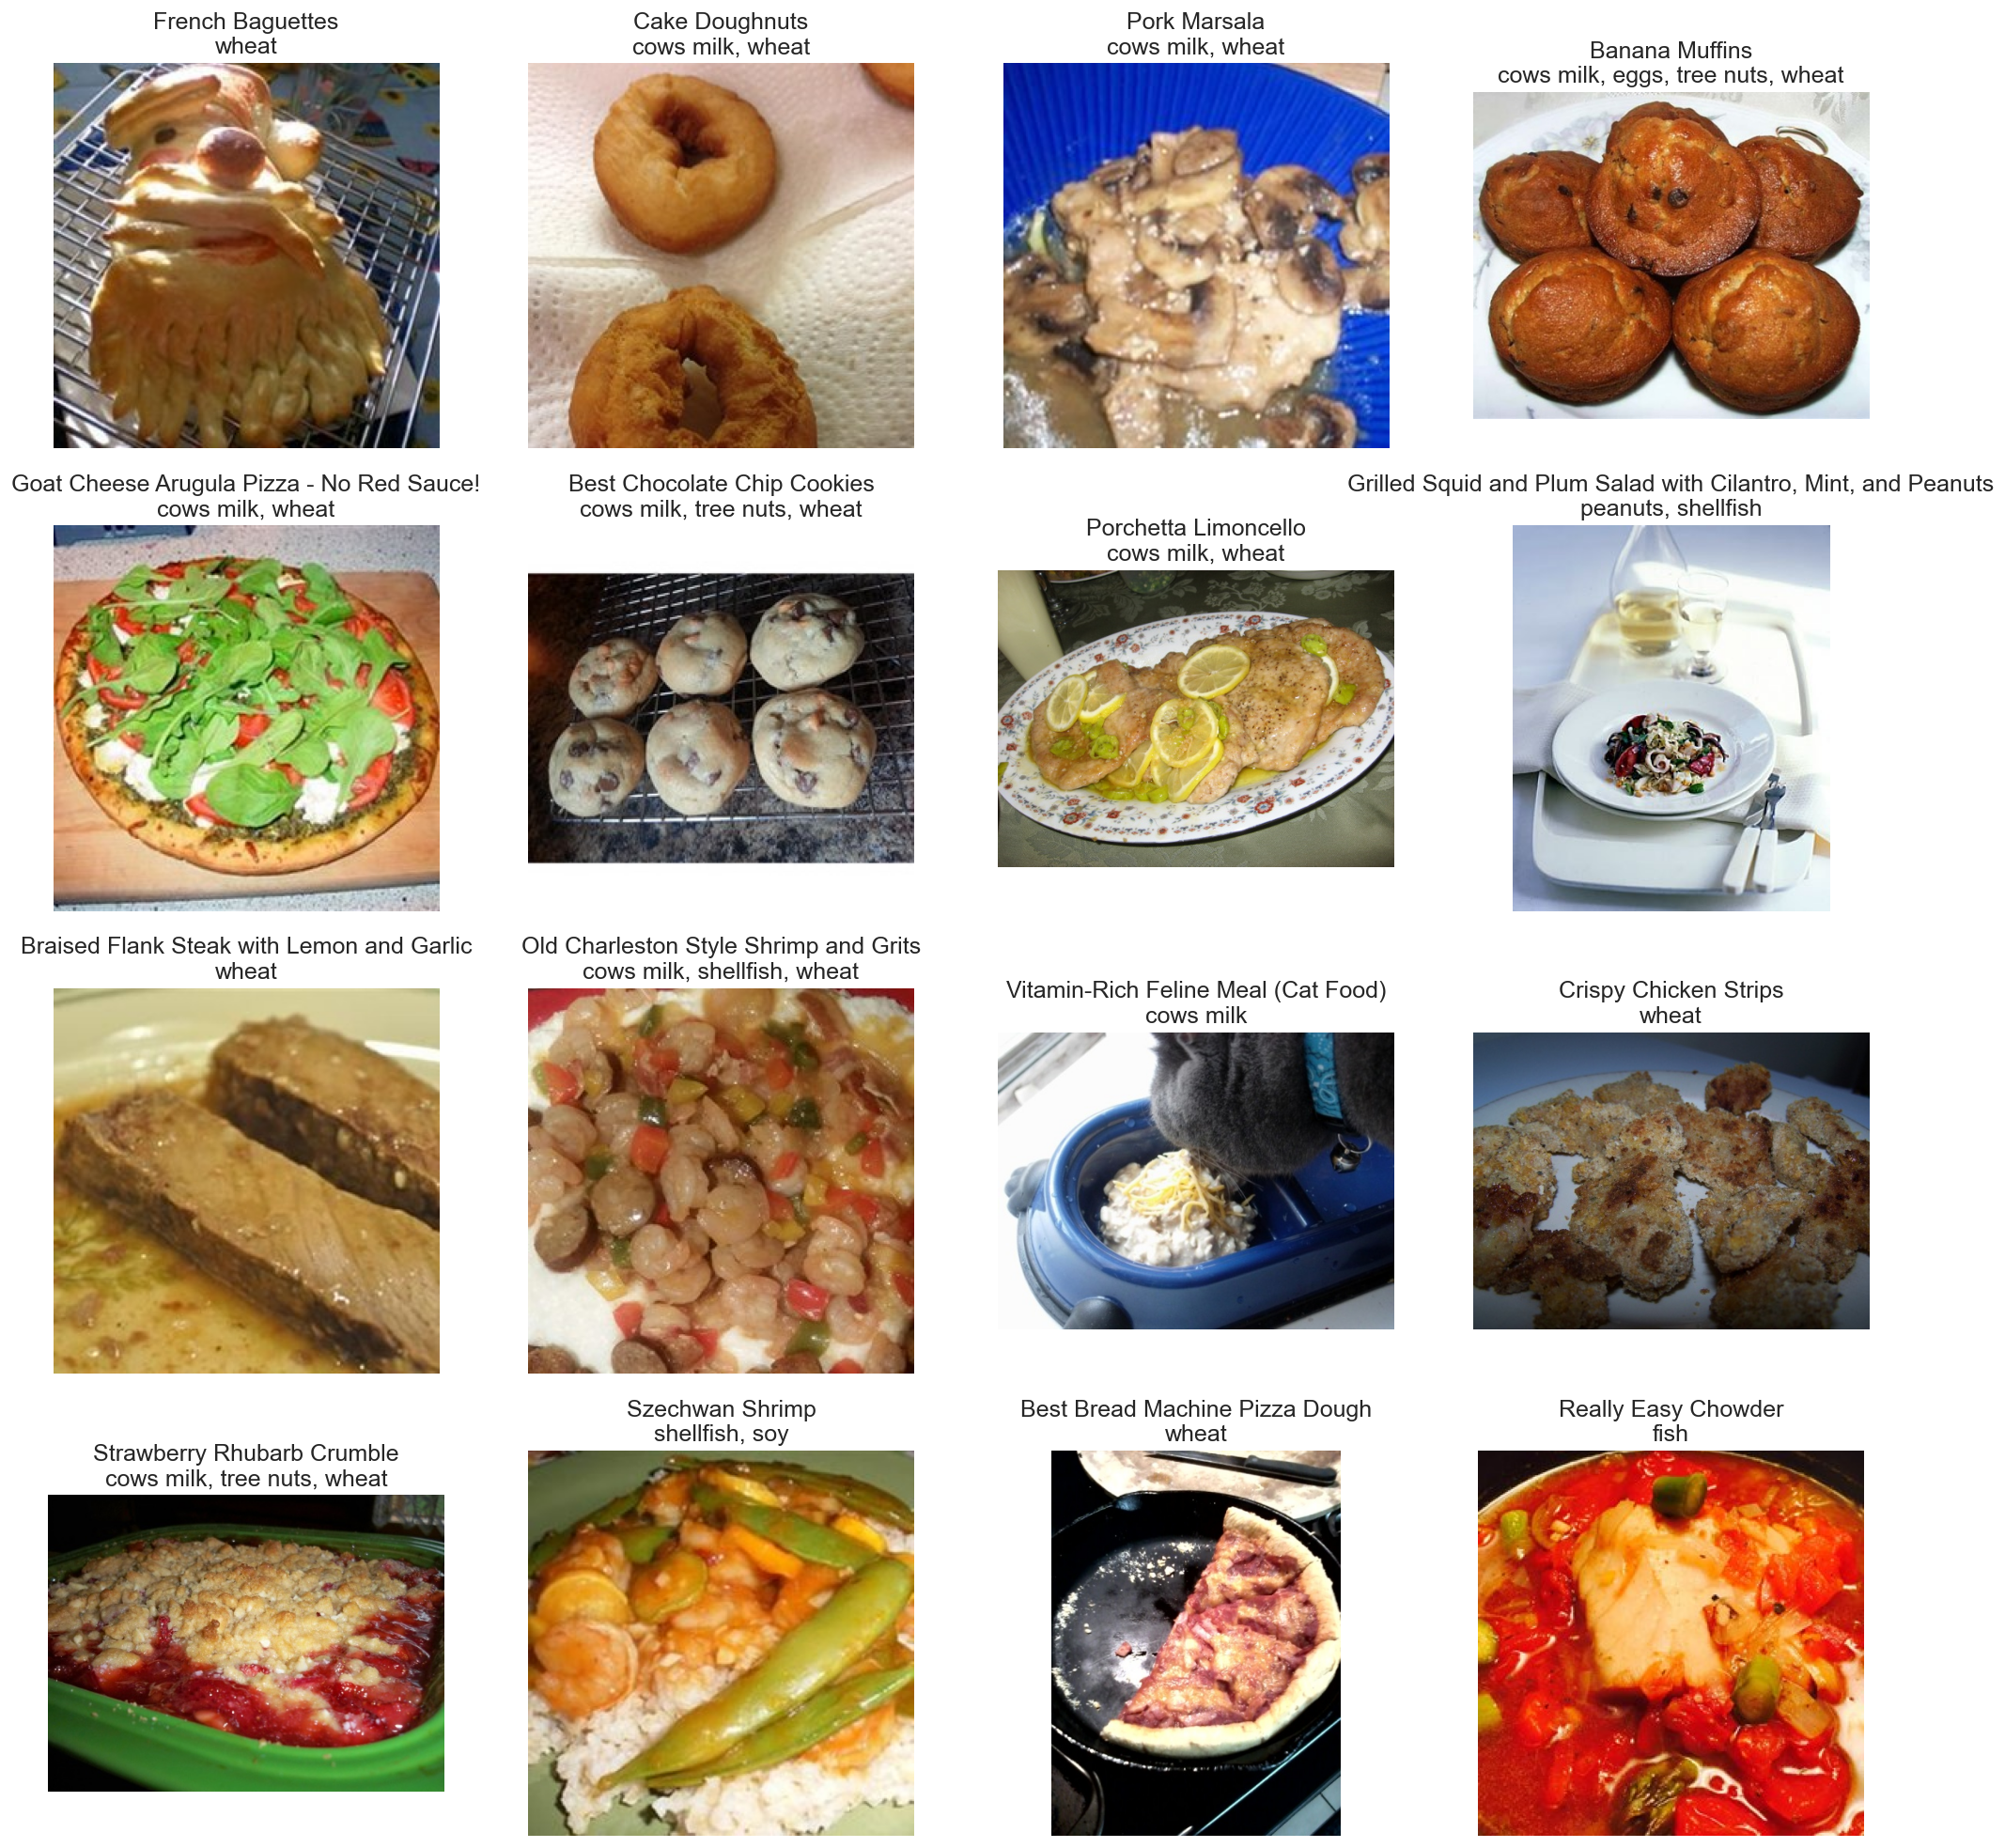

In [35]:
#subplot to show image and its title consisting of the image's file name and a list of values from a specified list.
fig, m_axs = plt.subplots(4, 4, figsize=(20, 20))
for c_ax, (_, c_row) in zip(m_axs.flatten(), 
                            sample_images_df.iterrows()):
    c_ax.imshow(imread(base_dir/ 'subset' / c_row['image_path']))
    c_title = ', '.join([k for k in c_alls if c_row[k]>0])
    c_ax.set_title('{}\n{}'.format(c_row['title'], c_title))
    c_ax.axis('off')

In [36]:
#converted to a JSON file using the to_json method and is saved to a file named 'clean_list.json'. 
image_overview_df[['image_path', 'title', 'ingredients_list']+c_alls].to_json('clean_list.json')